# Exploratory Data Analysis (EDA) of Prudential Life Insurance Sample Data

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_276805/2766678410.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdp


In [2]:
# Read data source csv files.
#data=pd.read_csv('''/home/jupyter-seshadhr/DSJungle/python/assignments/insurance/data/prudential_life_insurance_sample_data.csv''')

# Read data source csv files.
data=pd.read_csv('https://raw.githubusercontent.com/easonlai/eda_for_prudential_life_insurance_sample_data/main/data/prudential_life_insurance_sample_data.csv')

In [3]:
# Read header of dataframe.
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


Data Fields Description
* Id, A unique identifier associated with an application.
* Product_Info_1-7, A set of normalized variables relating to the product applied for
* Ins_Age, Normalized age of applicant
* Ht, Normalized height of applicant
* Wt, Normalized weight of applicant
* BMI, Normalized BMI of applicant
* Employment_Info_1-6, A set of normalized variables relating to the employment history of the applicant.
* InsuredInfo_1-6, A set of normalized variables providing information about the applicant.
* Insurance_History_1-9, A set of normalized variables relating to the insurance history of the applicant.
* Family_Hist_1-5, A set of normalized variables relating to the family history of the applicant.
* Medical_History_1-41, A set of normalized variables relating to the medical history of the applicant.
* Medical_Keyword_1-48, A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
* Response, This is the target variable, an ordinal variable relating to the final decision associated with an application

In [4]:
# Check dataframe information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


# Missing Value Analysis

In [5]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt

In [6]:
# Check missing value percentage in dataframe
missing_data(data)['Percent'].sort_values(ascending=False)

Medical_History_10    99.061990
Medical_History_32    98.135767
Medical_History_24    93.598963
Medical_History_15    75.101463
Family_Hist_5         70.411411
                        ...    
Medical_History_6      0.000000
Medical_History_5      0.000000
Medical_History_4      0.000000
Medical_History_3      0.000000
Response               0.000000
Name: Percent, Length: 128, dtype: float64

In [7]:
# Drop columns which has more than 75% missing value.
data=data[data.columns[data.isnull().mean() <= 0.75]]

In [8]:
# Count missing value in columns.
data.isnull().sum().sort_values(ascending=False)

Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
                       ...  
Medical_History_6          0
Medical_History_5          0
Medical_History_4          0
Medical_History_3          0
Response                   0
Length: 124, dtype: int64

In [9]:
# Take null value columns name.
list_data=data.columns[data.isna().any()].tolist()

In [10]:
# Print columns name and data types which has null values.
for i in range(0,len(list_data)):
    print('column name: ',list_data[i],' Dtype:',data[list_data[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


9 Features have Null values

In [11]:
# Fill Null Values With Mean.
for column in list_data:
    data[column].fillna(data[column].mean(), inplace=True)

## Categorical values
Encode categorical features using an ordinal encoding scheme.

In [12]:
# Check dataframe information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 124 entries, Id to Response
dtypes: float64(14), int64(109), object(1)
memory usage: 56.2+ MB


In [13]:
print(data.dtypes.to_string())

Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_History_8      int64
Insuranc

In [14]:
type(data['Id'])

pandas.core.series.Series

In [15]:
print(data.describe().T.to_string())

                       count          mean           std  min           25%           50%           75%           max
Id                   59381.0  39507.211515  22815.883089  2.0  19780.000000  39487.000000  59211.000000  79146.000000
Product_Info_1       59381.0      1.026355      0.160191  1.0      1.000000      1.000000      1.000000      2.000000
Product_Info_3       59381.0     24.415655      5.072885  1.0     26.000000     26.000000     26.000000     38.000000
Product_Info_4       59381.0      0.328952      0.282562  0.0      0.076923      0.230769      0.487179      1.000000
Product_Info_5       59381.0      2.006955      0.083107  2.0      2.000000      2.000000      2.000000      3.000000
Product_Info_6       59381.0      2.673599      0.739103  1.0      3.000000      3.000000      3.000000      3.000000
Product_Info_7       59381.0      1.043583      0.291949  1.0      1.000000      1.000000      1.000000      3.000000
Ins_Age              59381.0      0.405567      0.197190

In [16]:
(data.select_dtypes(include=['object'])) #needs to be transformed

,Product_Info_2
0,D3
1,A1
2,E1
3,D4
4,D2
...,...
59376,D1
59377,D3
59378,E1
59379,D2


In [17]:
data['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [18]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
data['Product_Info_2']= le.fit_transform(data['Product_Info_2'])

In [19]:
data['Product_Info_2'].unique()

array([16,  0, 18, 17, 15,  7,  1, 14,  6,  5,  2,  4, 13, 10,  9, 12, 11,
        3,  8])

## What are other types of encoding schemes? 
TODO --->>  Try OneHotEncoder

Let's try using OneHotEncoder for 'Product_Info_2' to see how they differ!

In [20]:
# Using OneHotEncoder from sklearn. 
from sklearn.preprocessing import OneHotEncoder

# First, we must initialize the encoder. 
encoder = OneHotEncoder(sparse=False)

#We're going to do this for the 'Product_Info_2' column, but instead of label encoding, we're going to use OHE.

# Fiting and transforming the column
encoded_data = encoder.fit_transform(data[['Product_Info_2']])

# Getting category names from encoder. 
categories = encoder.categories_[0]

# Creating new column names based on the category. 
new_columns = [f'Product_Info_2_{category}' for category in categories]

# Creating a new df with the OHE data and the new column names
encoded_df = pd.DataFrame(encoded_data, columns=new_columns)

# I want to see if this worked, so I'm going to print the values in the one-hot encoded columns
for column in encoded_df.columns:
    unique_values = encoded_df[column].unique()
    print(f'Unique values in column {column}:\n{unique_values}\n')

# Yep, that looks right to me. Now 'Product_Info_2' is one-hot encoded. 

Unique values in column Product_Info_2_0:
[0. 1.]

Unique values in column Product_Info_2_1:
[0. 1.]

Unique values in column Product_Info_2_2:
[0. 1.]

Unique values in column Product_Info_2_3:
[0. 1.]

Unique values in column Product_Info_2_4:
[0. 1.]

Unique values in column Product_Info_2_5:
[0. 1.]

Unique values in column Product_Info_2_6:
[0. 1.]

Unique values in column Product_Info_2_7:
[0. 1.]

Unique values in column Product_Info_2_8:
[0. 1.]

Unique values in column Product_Info_2_9:
[0. 1.]

Unique values in column Product_Info_2_10:
[0. 1.]

Unique values in column Product_Info_2_11:
[0. 1.]

Unique values in column Product_Info_2_12:
[0. 1.]

Unique values in column Product_Info_2_13:
[0. 1.]

Unique values in column Product_Info_2_14:
[0. 1.]

Unique values in column Product_Info_2_15:
[0. 1.]

Unique values in column Product_Info_2_16:
[1. 0.]

Unique values in column Product_Info_2_17:
[0. 1.]

Unique values in column Product_Info_2_18:
[0. 1.]



/home/jupyter-tanggn/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# As we can see, there are multiple ways to handle encoding with categorical variables. 

## Label Encoding
With label encoding, we assign a unique integer to each category within a categorical variable. This can be a useful way to handle encoding if there is an ordinal relationship between categories. For instance, if the categories have a clear order like "low", "medium", or "high" label encoding can be a very valuable tool in the representation of this order. However, a con is that in cases where there is no clear order, using label encoding might give a false sense of order which will skew results and impact accuracy. Sometimes integer values can be mistaken as numerical data by certain algorithms as well, so it is always important to check.

## One-Hot Encoding (OneHotEncoder)
We used one-hot encoding as the second approach to handle encoding with categorical variables. This approach is often used when there is no ranking between categories, and all of them are of equal importance. Each category is transformed into a binary vector, so this technique works quite well for most categorical variables because it keeps the independence of each. Although it is important to note that using one-hot encoding may significantly increase the dimensionality in the dataset, which is not optimal when working with large data or data with a lot of missing data. It also might lead to some multicollinearity which, as you imagine, can be a glaring issue with this method. 

## Binary Encoding
Binary Encoding is a technique that is similar to a hybrid of label encoding and one-hot encoding. It assigns a unique integer to each category (label encoding), then converts those integers into binary code and separates the digits as columns (OHE). This can be a good method to utilize since it can preserve the original categorical information and also aid in reducing dimensionality in comparison to OHE. However, ordinality may be present if it is not used carefully so it is crucial to be attentive to this fact. 

## Count Encoding
Count encoding is another way to handle encoding with categorical variables. Essentially, this approach replaces each category with the count of occurrences of the category in the dataset. This can be a good method to use when you want to capture the frequency information of categories. It can also be useful when working with datasets where the categorical variable has a very large amount of unique categories or levels. This can help reduce dimensionality, which can be helpful. However, the con of this method is that it may not work well if there are two different categories with the same count, since they would receive the same encoding. 

In any case, choosing the right method for encoding depends on the specific dataset, ML algorithms used, as well as the nature of these categorical variables. It is always a good idea to experiment with different ones and see which works best for your coding purposes! 

## Analysing features

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_276805/1465350867.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Wt'],  ax=axes[1])


<Axes: xlabel='Wt', ylabel='Density'>

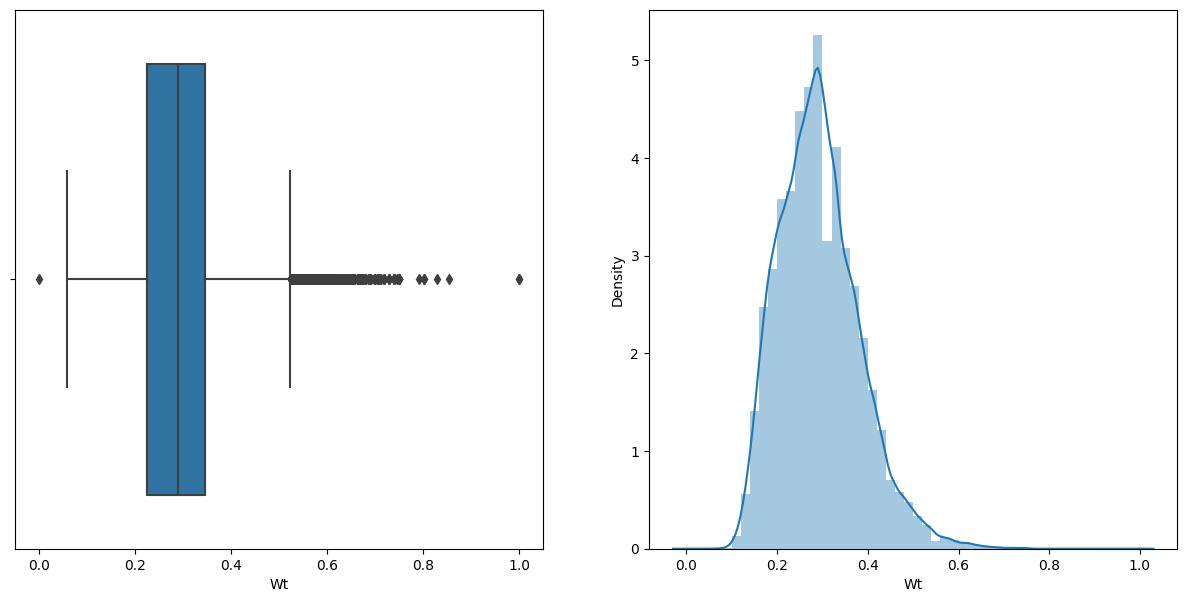

In [21]:
# Weight
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Wt'],  ax=axes[1])

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_276805/741276995.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Ht'],  ax=axes[1])


<Axes: xlabel='Ht', ylabel='Density'>

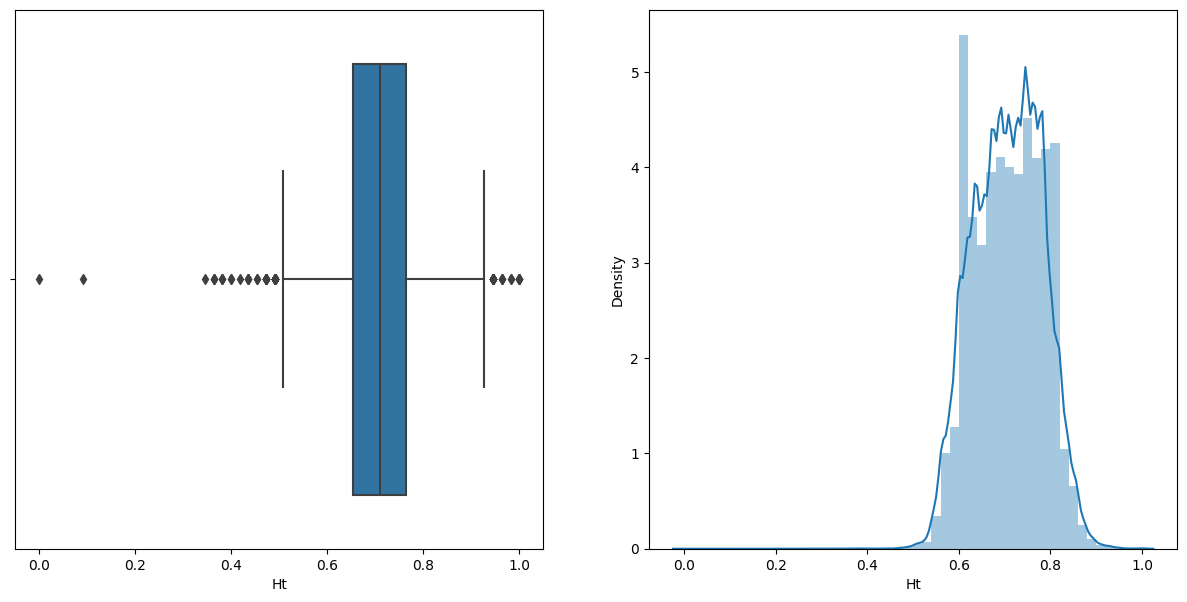

In [22]:
# Height
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Ht'],  ax=axes[1])

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_276805/3043868735.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'],  ax=axes[1])


<Axes: xlabel='BMI', ylabel='Density'>

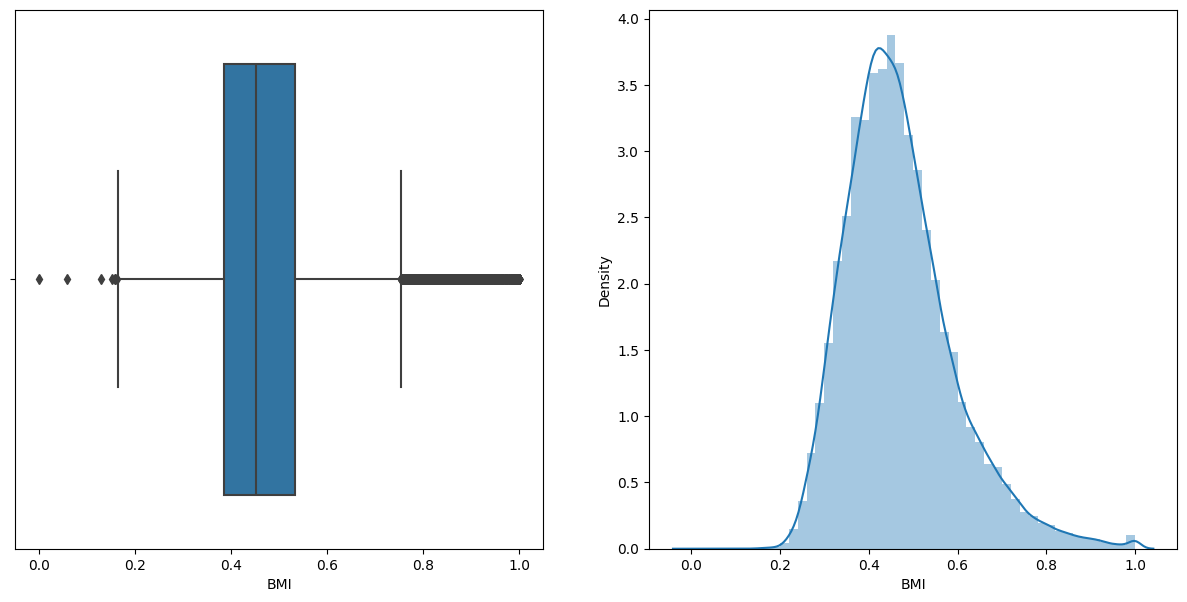

In [23]:
# BMI
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['BMI'],  ax=axes[1])

/opt/tljh/user/lib/python3.10/site-packages/seaborn/_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/tmp/ipykernel_276805/3047901050.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Ins_Age'],ax=axes[1])


<Axes: xlabel='Ins_Age', ylabel='Density'>

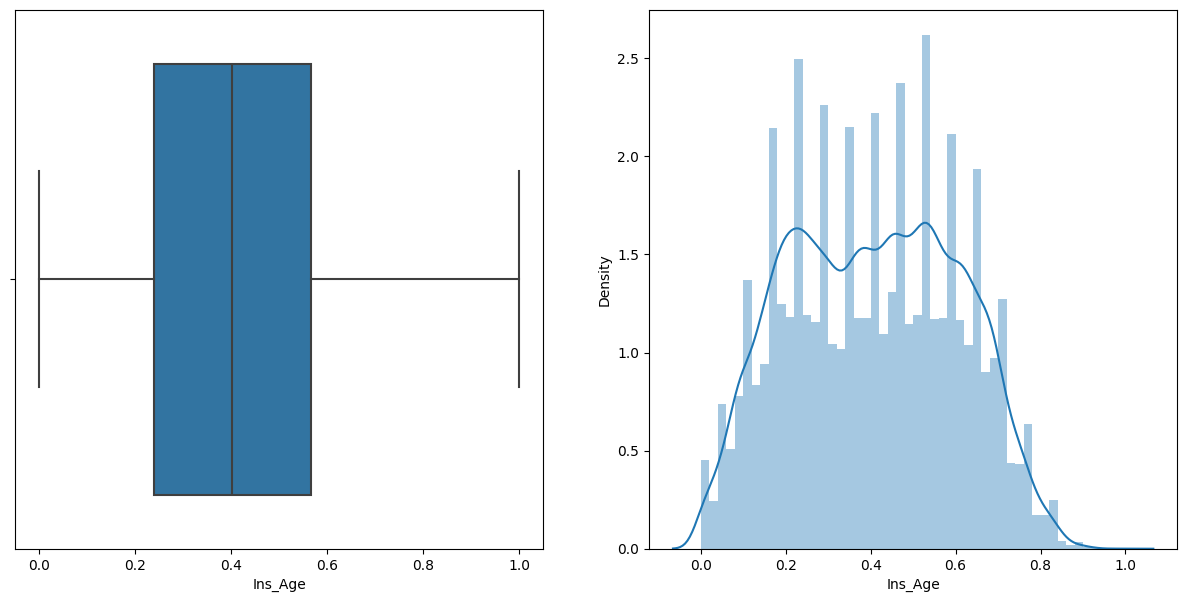

In [24]:
# Age
f,axes=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='Ins_Age',data=data,orient='v',ax=axes[0])
sns.distplot(data['Ins_Age'],ax=axes[1])

# Target Variable Analysis

In [25]:
#f,ax=plt.subplots(1,2,figsize=(18,8))
#data['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
#ax[0].set_title('Response')
#ax[0].set_ylabel('')
#sns.countplot('Response',data=data,ax=ax[1])
#ax[1].set_title('Response')
#plt.show()

In [26]:
# Make 0 to 7 as one class and 8 as another class.
# Create a function to create a new target variable based on conditions.
def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

In [27]:
# Create a copy of original dataframe.
new_data=data.copy()

In [28]:
# Create a new column.
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [29]:
new_data['Final_Response'].value_counts()

Final_Response
0    39892
1    19489
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of rows by response categories')

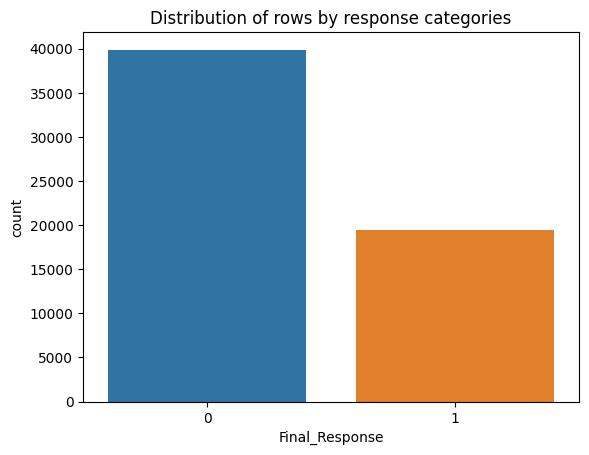

In [30]:
# Distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [31]:
# Drop already existing column.
new_data.drop(['Response'],axis=1,inplace=True)
data=new_data
del new_data

In [32]:
data.rename(columns={'Final_Response':'Response'},inplace=True)

Response = 0 (Life Insurance Policy is not being approved, from class 0-7)

Response = 1 (Life Insurance Policy is approved, from class 8)

# Analysis based on BMI, AGE, HEIGHT and WEIGHT vs Response (0, 1)

In [33]:
# BMI, AGE, HEIGHT and WEIGHT categorization based on their values.
# BMI Categorization
conditions = [
    (data['BMI'] <= data['BMI'].quantile(0.25)),
    (data['BMI'] > data['BMI'].quantile(0.25)) & (data['BMI'] <= data['BMI'].quantile(0.75)),
    (data['BMI'] > data['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

data['BMI_Wt'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (data['Ins_Age'] <= data['Ins_Age'].quantile(0.25)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.25)) & (data['Ins_Age'] <= data['Ins_Age'].quantile(0.75)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
data['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (data['Ht'] <= data['Ht'].quantile(0.25)),
    (data['Ht'] > data['Ht'].quantile(0.25)) & (data['Ht'] <= data['Ht'].quantile(0.75)),
    (data['Ht'] > data['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

data['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (data['Wt'] <= data['Wt'].quantile(0.25)),
    (data['Wt'] > data['Wt'].quantile(0.25)) & (data['Wt'] <= data['Wt'].quantile(0.75)),
    (data['Wt'] > data['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

data['Thin_Fat'] = np.select(conditions, choices)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

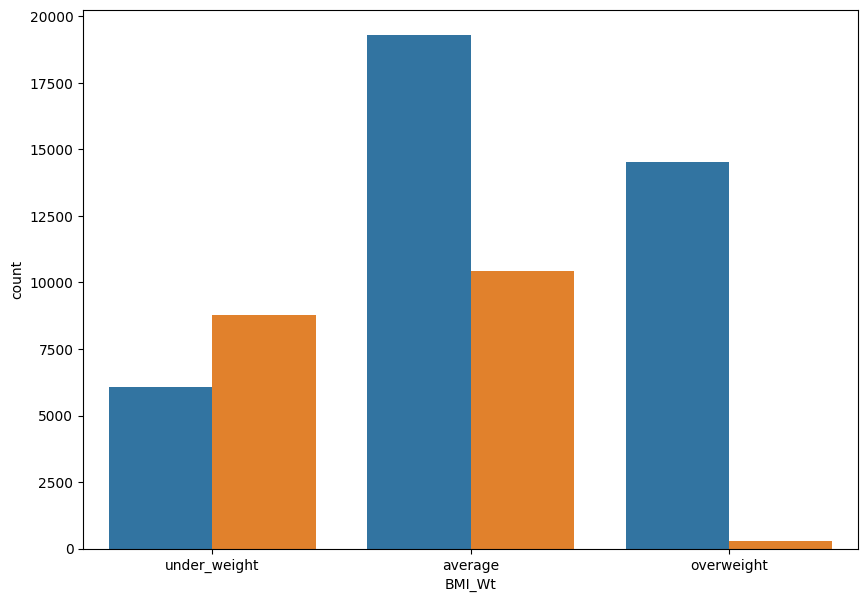

In [34]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = data)

* Overweighted (High BMI) policyholders are not being approved for Life Insurance Policy in most cases.

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Old_Young', hue = 'Response', data = data)

* Old age policyholders are not being approved for Life Insurance Policy in most cases, comparing with Young and Average.

* Average age policyholders are not being approved for Life Insurance Policy in most cases, it's really depends on other factors/feature situation.

AttributeError: 'numpy.int64' object has no attribute 'startswith'

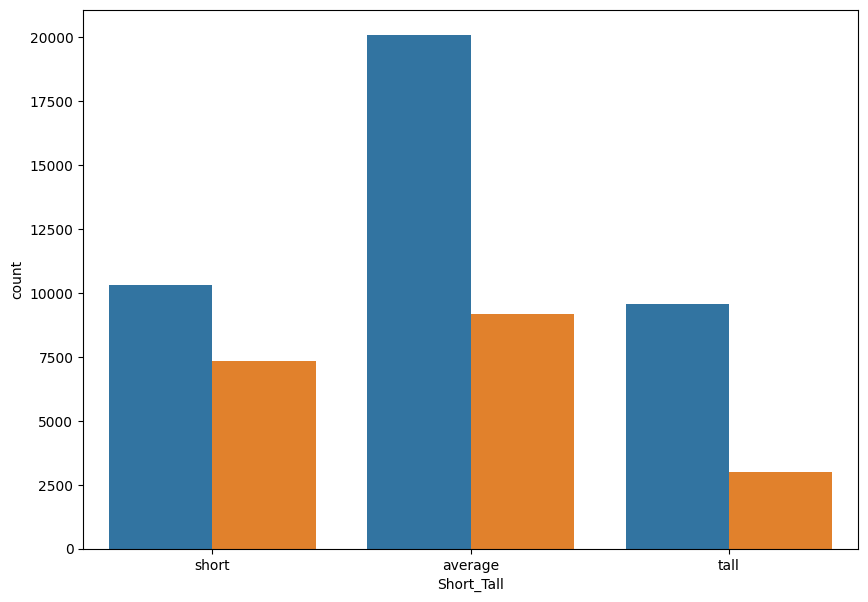

In [35]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Response', data = data)

* Short or Tall did not indicate any insight.

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Response', data = data)

* Similar as Overweighted (High BMI) situation, policyholders are not being approved for Life Insurance Policy in most cases.

Let's based on 3 key factors/features to go deeper analysis.

In [36]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

data['extreme_risk'] = data.apply(new_target,axis=1)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

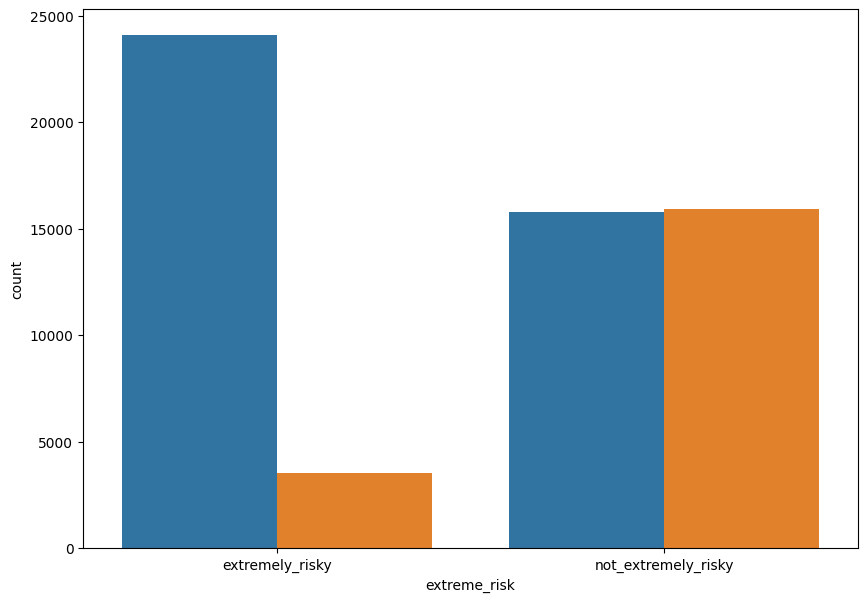

In [37]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'extreme_risk', hue = 'Response', data = data)

* In most cases, policyholders are not being approved for Life Insurance Policy if it's under high risk (High BMI, Old Age, Overweighted).

In [ ]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Old_Young']=='average')  or (row['Thin_Fat']=='average'):
        val='average'
    else:
        val='non_average'
    return val

data['average_risk'] = data.apply(new_target,axis=1)

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'average_risk', hue = 'Response', data = data)

* Average did not indicate any insight.

In [ ]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

data['low_end_risk'] = data.apply(new_target,axis=1)

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Response', data = data)

ValueError: Could not interpret input 'low_end_risk'

<Figure size 1000x700 with 0 Axes>

* If fall into low_end risk category, approval is nearly 50%. In another angle, if not fall into low_end risk category, higher chance not being approved.

/tmp/ipykernel_276805/2257320511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==0]['Product_Info_1'],hist=False,label='Rejected') # Blue Line
/tmp/ipykernel_276805/2257320511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==

<Axes: xlabel='Product_Info_1', ylabel='Density'>

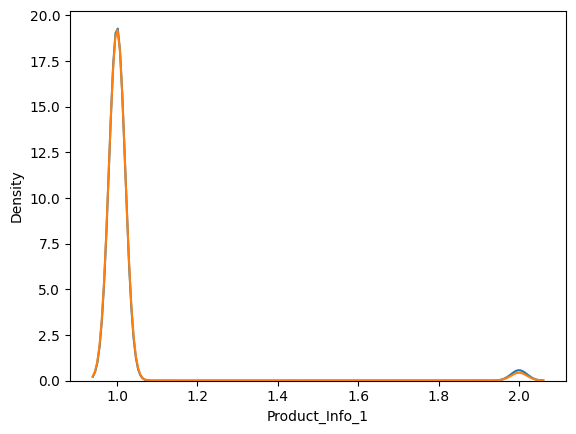

In [39]:
# Discover relationship between Product1 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_1'],hist=False,label='Rejected') # Blue Line
sns.distplot(data[data['Response']==1]['Product_Info_1'],hist=False,label='Accepted') # Orange Line

/tmp/ipykernel_276805/2416893575.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==0]['Product_Info_2'],hist=False,label='Rejected')
/tmp/ipykernel_276805/2416893575.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==1]['Product_

<Axes: xlabel='Product_Info_2', ylabel='Density'>

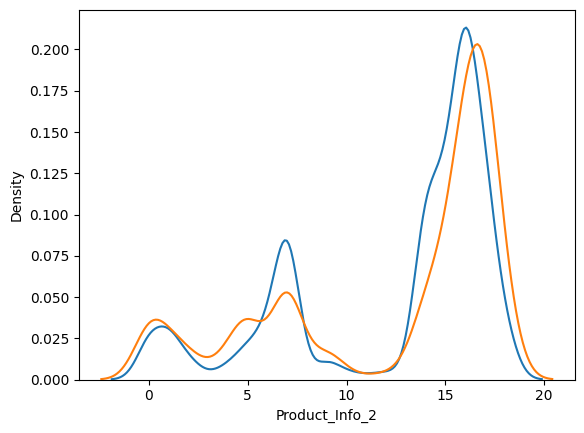

In [40]:
# Discover relationship between Product2 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_2'],hist=False,label='Rejected')
sns.distplot(data[data['Response']==1]['Product_Info_2'],hist=False,label='Accepted')

/tmp/ipykernel_276805/498495297.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
/tmp/ipykernel_276805/498495297.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Response']==1]['Product_In

<Axes: xlabel='Product_Info_3', ylabel='Density'>

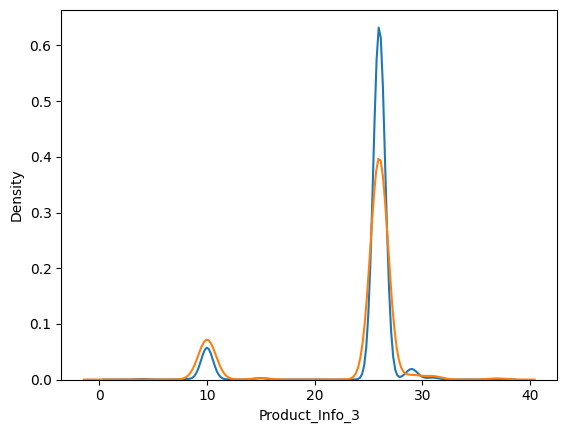

In [41]:
# Discover relationship between Product3 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(data[data['Response']==1]['Product_Info_3'],hist=False,label='Accepted')

In [42]:
# Print overall heatmap of all columns.
plt.figure(figsize = (30,30))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 370, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

ValueError: could not convert string to float: 'under_weight'

<Figure size 3000x3000 with 0 Axes>

Dark Reds and Darg Greens are Higly Correlated Features 
- Reduce the Dimensions of the features slightly
- However, will lose some explainatory power 

TradeOff between Efficacy vs Interpretability Anlaysis


## Using Pandas Profiler to Analyze every feature

In [ ]:
#%pip install pandas_profiling

In [ ]:
#Can take some time run - Uncomment below for the second run of this notebook
#profile = pdp.ProfileReport(data, title="Pandas Profiling Report")
#profile

## Further Feature Analysis

In [43]:
data.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_45', 'Medical_Keyword_46', 'Medical_Keyword_47',
       'Medical_Keyword_48', 'Response', 'BMI_Wt', 'Old_Young', 'Short_Tall',
       'Thin_Fat', 'extreme_risk'],
      dtype='object', length=129)

In [44]:
dfFeatureCorr = pd.DataFrame(columns=['feature','corr'])
for col in data.columns:
    #print(col)
    if col in ('BMI_Wt', 'Old_Young', 'Thin_Fat', 'Short_Tall', 'extreme_risk', 'average_risk', 'low_end_risk', 'Response'):
        continue
    dfFeatureCorr.loc[len(dfFeatureCorr.index)] = [col, data[col].corr(data['Response'])]

In [45]:
dfFeatureCorr

,feature,corr
0,Id,-0.004526
1,Product_Info_1,-0.019621
2,Product_Info_2,-0.010644
3,Product_Info_3,-0.094939
4,Product_Info_4,0.174690
...,...,...
118,Medical_Keyword_44,-0.017720
119,Medical_Keyword_45,0.002213
120,Medical_Keyword_46,-0.048249
121,Medical_Keyword_47,-0.039269


<Axes: xlabel='feature', ylabel='corr'>

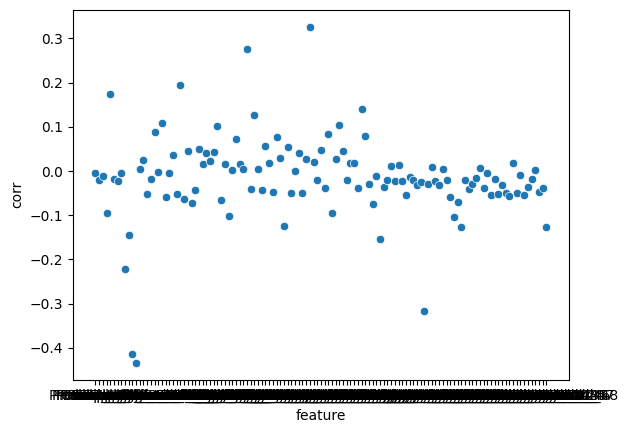

In [46]:
sns.scatterplot(data=dfFeatureCorr, x="feature", y="corr")

Many features are uncorrelated to response
- However the relationship betweeen these features could still explain Response

In [47]:
dfFeatureCorr['feature'].values

corr = data.corr(numeric_only=True)

array(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ins_Age', 'Ht', 'Wt', 'BMI',
       'Employment_Info_1', 'Employment_Info_2', 'Employment_Info_3',
       'Employment_Info_4', 'Employment_Info_5', 'Employment_Info_6',
       'InsuredInfo_1', 'InsuredInfo_2', 'InsuredInfo_3', 'InsuredInfo_4',
       'InsuredInfo_5', 'InsuredInfo_6', 'InsuredInfo_7',
       'Insurance_History_1', 'Insurance_History_2',
       'Insurance_History_3', 'Insurance_History_4',
       'Insurance_History_5', 'Insurance_History_7',
       'Insurance_History_8', 'Insurance_History_9', 'Family_Hist_1',
       'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_4', 'Family_Hist_5',
       'Medical_History_1', 'Medical_History_2', 'Medical_History_3',
       'Medical_History_4', 'Medical_History_5', 'Medical_History_6',
       'Medical_History_7', 'Medical_History_8', 'Medical_History_9',
       'Medical_History_11', '

In [48]:
dfFeatureCorr['feature']

0                      Id
1          Product_Info_1
2          Product_Info_2
3          Product_Info_3
4          Product_Info_4
              ...        
118    Medical_Keyword_44
119    Medical_Keyword_45
120    Medical_Keyword_46
121    Medical_Keyword_47
122    Medical_Keyword_48
Name: feature, Length: 123, dtype: object

In [49]:
#Subset columns - only feature columns from data + Response Column
dfXY = data[dfFeatureCorr['feature'].values]
dfXY['Response'] = data['Response']
dfXY

/tmp/ipykernel_276805/2185145523.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfXY['Response'] = data['Response']


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,16,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,1
1,5,1,0,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
2,6,1,18,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,1
3,7,1,17,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,1
4,8,1,15,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,79142,1,14,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,0
59377,79143,1,16,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,0
59378,79144,1,18,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,1
59379,79145,1,15,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,1


In [50]:
print(dfXY.describe().T.to_string())

                       count          mean           std  min           25%           50%           75%           max
Id                   59381.0  39507.211515  22815.883089  2.0  19780.000000  39487.000000  59211.000000  79146.000000
Product_Info_1       59381.0      1.026355      0.160191  1.0      1.000000      1.000000      1.000000      2.000000
Product_Info_2       59381.0     12.505381      5.415902  0.0      7.000000     15.000000     16.000000     18.000000
Product_Info_3       59381.0     24.415655      5.072885  1.0     26.000000     26.000000     26.000000     38.000000
Product_Info_4       59381.0      0.328952      0.282562  0.0      0.076923      0.230769      0.487179      1.000000
Product_Info_5       59381.0      2.006955      0.083107  2.0      2.000000      2.000000      2.000000      3.000000
Product_Info_6       59381.0      2.673599      0.739103  1.0      3.000000      3.000000      3.000000      3.000000
Product_Info_7       59381.0      1.043583      0.291949

In [51]:
# Take null value columns name.
#list_data=dfXY.columns[dfXY.isna().any()].tolist()

In [52]:
# Print columns name and data types which has null values.
#for i in range(0,len(list_data)):
#    print('column name: ',list_data[i],' Dtype:',dfXY[list_data[i]].dtypes)

In [53]:
#Remove NaNs for PCA
#dfXY = dfXY.dropna(axis=1) #losing 4 rows
#dfXY

In [54]:
dfY= dfXY[['Response']]
dfX = dfXY.drop(columns='Response')

In [55]:
type(dfY)

pandas.core.frame.DataFrame

In [56]:
#Reduce Dimensions of features from 127 to 100
from sklearn import decomposition
from sklearn import datasets

pca = decomposition.PCA(n_components=100) #n_components ==> HyperParameter
pca.fit(dfX)
npX = pca.transform(dfX)

In [57]:
type(npX)

numpy.ndarray

In [58]:
# defining column headers for the 
# Pandas dataframe
columns = ['Feature_' + str(i) for i in range(1, len(npX[0]) + 1)]
  
# generating the Pandas dataframe
# from the Numpy array and specifying the reduced dimensions column headers
dfXY= pd.DataFrame(npX, columns = columns)

In [59]:
dfXY

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_91,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100
0,-39505.216243,-140.652618,-3.715001,0.151864,12.877069,8.432080,-0.137116,2.066225,1.049751,-0.647207,...,0.014602,0.006548,-0.037225,0.012364,0.029888,-0.158504,0.003981,0.034382,-0.000096,0.013453
1,-39502.206196,159.321443,-3.583449,12.934081,-3.638477,-6.251464,0.325982,1.372533,-1.350117,-0.481385,...,-0.003831,-0.011267,0.004377,-0.001145,0.007300,-0.016026,-0.042670,-0.004516,-0.014193,0.010036
2,-39501.219914,-249.656784,2.588738,-5.702205,0.829628,-0.782742,2.165713,-2.082795,-0.773540,0.107214,...,-0.004161,-0.001023,0.002921,0.003062,0.007317,0.008571,-0.041267,0.013731,0.020779,-0.007999
3,-39500.208263,97.337528,-8.194267,-0.024972,13.949333,5.708487,2.132347,-1.960475,-0.955815,0.229903,...,0.023108,-0.020270,0.001358,-0.001058,-0.000725,0.014560,-0.011905,0.012146,0.006612,-0.002539
4,-39499.214579,-90.663132,0.205206,-2.861797,-0.462820,-0.439350,0.250171,-2.219235,-0.737942,0.077737,...,-0.002036,-0.006945,-0.002736,0.001868,-0.007831,-0.004345,0.009640,-0.000812,-0.003381,0.005494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,39634.788704,5.683246,-8.147271,4.684449,15.660381,-1.477635,2.183350,-1.780738,0.048852,-0.963019,...,0.007027,-0.011458,0.002970,-0.005611,0.004286,0.000631,-0.025485,0.012130,-0.000811,-0.001417
59377,39635.796394,235.715574,15.684611,-3.410986,-0.453615,-0.928919,-2.867995,0.532761,-1.410761,-0.069319,...,-0.009125,0.000155,-0.009021,-0.007197,-0.009967,-0.005476,0.004907,-0.022875,-0.021493,0.006750
59378,39636.785376,-93.314209,0.317522,-5.661492,0.614032,-0.852966,0.227429,-2.204782,-0.571930,0.067879,...,0.010743,0.005261,0.012847,0.019116,-0.015028,-0.007955,0.018761,-0.013912,0.000518,0.003119
59379,39637.780498,-239.314864,-7.503640,1.764060,13.557786,5.921760,-2.833416,-1.899379,0.992539,-1.013449,...,-0.002670,-0.005837,0.001262,-0.012145,-0.024469,-0.008323,0.027879,-0.003314,-0.018529,-0.006978


In [60]:
print(dfXY.describe().T.to_string())

               count          mean           std           min           25%        50%           75%           max
Feature_1    59381.0  2.007533e-12  22815.883102 -39505.216243 -19727.216265 -20.214601  19703.785382  39638.785379
Feature_2    59381.0 -7.413069e-15    178.620012   -254.225710   -141.356922 -91.575904    163.318899    393.370018
Feature_3    59381.0  4.231116e-16     12.012757     -9.110572     -6.026697  -2.545121      0.349543    232.105666
Feature_4    59381.0  3.503594e-16      5.464162    -12.415728     -4.152298  -2.485876      4.414302     19.700645
Feature_5    59381.0  2.546328e-16      5.228747    -17.490418     -2.623281  -0.700089      0.240323     23.071593
Feature_6    59381.0  1.429677e-15      4.017458    -14.430123     -0.785141  -0.470830      1.991877     32.797548
Feature_7    59381.0 -1.098463e-15      2.676141     -5.188535     -2.787915   0.216184      2.172469      5.707260
Feature_8    59381.0  9.835909e-17      1.758437     -2.784234     -1.95

In [61]:
dfXY['Response'] = dfY['Response']

In [62]:
dfXY

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_92,Feature_93,Feature_94,Feature_95,Feature_96,Feature_97,Feature_98,Feature_99,Feature_100,Response
0,-39505.216243,-140.652618,-3.715001,0.151864,12.877069,8.432080,-0.137116,2.066225,1.049751,-0.647207,...,0.006548,-0.037225,0.012364,0.029888,-0.158504,0.003981,0.034382,-0.000096,0.013453,1
1,-39502.206196,159.321443,-3.583449,12.934081,-3.638477,-6.251464,0.325982,1.372533,-1.350117,-0.481385,...,-0.011267,0.004377,-0.001145,0.007300,-0.016026,-0.042670,-0.004516,-0.014193,0.010036,0
2,-39501.219914,-249.656784,2.588738,-5.702205,0.829628,-0.782742,2.165713,-2.082795,-0.773540,0.107214,...,-0.001023,0.002921,0.003062,0.007317,0.008571,-0.041267,0.013731,0.020779,-0.007999,1
3,-39500.208263,97.337528,-8.194267,-0.024972,13.949333,5.708487,2.132347,-1.960475,-0.955815,0.229903,...,-0.020270,0.001358,-0.001058,-0.000725,0.014560,-0.011905,0.012146,0.006612,-0.002539,1
4,-39499.214579,-90.663132,0.205206,-2.861797,-0.462820,-0.439350,0.250171,-2.219235,-0.737942,0.077737,...,-0.006945,-0.002736,0.001868,-0.007831,-0.004345,0.009640,-0.000812,-0.003381,0.005494,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59376,39634.788704,5.683246,-8.147271,4.684449,15.660381,-1.477635,2.183350,-1.780738,0.048852,-0.963019,...,-0.011458,0.002970,-0.005611,0.004286,0.000631,-0.025485,0.012130,-0.000811,-0.001417,0
59377,39635.796394,235.715574,15.684611,-3.410986,-0.453615,-0.928919,-2.867995,0.532761,-1.410761,-0.069319,...,0.000155,-0.009021,-0.007197,-0.009967,-0.005476,0.004907,-0.022875,-0.021493,0.006750,0
59378,39636.785376,-93.314209,0.317522,-5.661492,0.614032,-0.852966,0.227429,-2.204782,-0.571930,0.067879,...,0.005261,0.012847,0.019116,-0.015028,-0.007955,0.018761,-0.013912,0.000518,0.003119,1
59379,39637.780498,-239.314864,-7.503640,1.764060,13.557786,5.921760,-2.833416,-1.899379,0.992539,-1.013449,...,-0.005837,0.001262,-0.012145,-0.024469,-0.008323,0.027879,-0.003314,-0.018529,-0.006978,1


<Axes: xlabel='feature', ylabel='corr'>

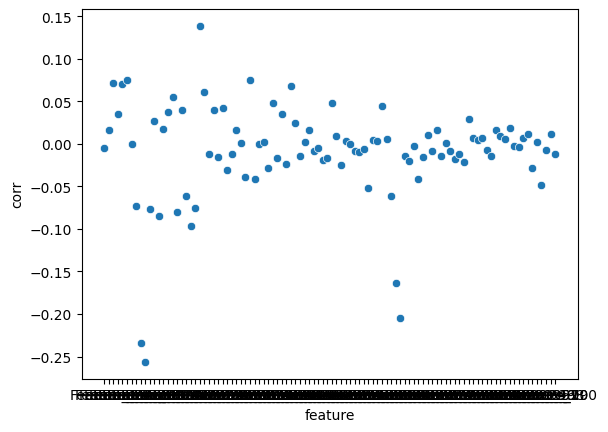

In [63]:
df2FeatureCorr = pd.DataFrame(columns=['feature','corr'])
for col in dfXY.columns:
    if col in ('Response'):
        continue
    df2FeatureCorr.loc[len(df2FeatureCorr.index)] = [col, dfXY[col].corr(dfXY['Response'])]
sns.scatterplot(data=df2FeatureCorr, x="feature", y="corr")

- Lost some highly correlated features
- Also lost some high correlated features
- Remembering does not imply reminding, correlation does not imply causation

<Axes: xlabel='feature', ylabel='corr'>

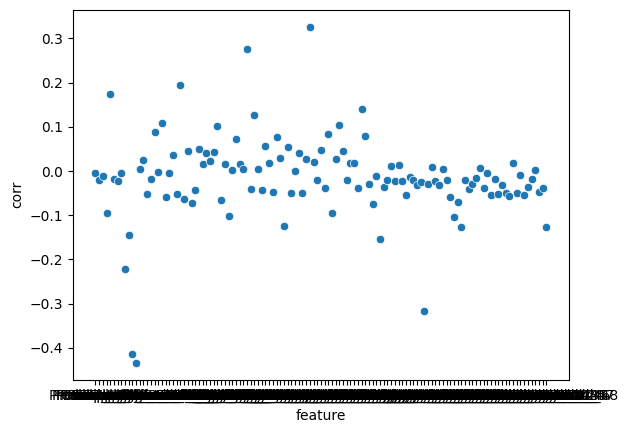

In [64]:
sns.scatterplot(data=dfFeatureCorr, x="feature", y="corr")

## TODO: Perform further feature extraction by Hyperparamter tuning
- Choose the number of Features for the model

In [ ]:
# Importing needed packages
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Will define the classifier, I'm going to use RF.
# RF is often used for hyperparameter tuning because it is a robust model + has good out of box performance. It can also handle both classification + regression tasks and is a versatile choice. 
# n_estimators is 100 which is the number of trees in the forest (setting higher will provide more robust and accurate results but computational costs must be considered.
# set to random_state = 42 for code reproducibility
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Using SelectKBest from sklearn to select the top independent variables from dataset based on statistical test. 
# f_classif here is the statistical test that we will use to compute the feature scores. 
feature_selector = SelectKBest(score_func=f_classif)

# We now need to make our hyperparameter grid of what we want to test when we optimize our model.
param_grid = {
    'feature_selection__k': [10, 20],  # Choosing the number of features to select. Keeping it low because I tried setting this higher but computational cost was too high and the code took 15+ mins and it still did not run. 
    'classify__n_estimators': [100], # 100 decision trees
    'classify__max_depth': [None, 10], # Testing two values, "none" indicating no max depth to 10 to see how the tree depth will impact the model. 
    'classify__min_samples_split': [2, 5], # Setting the minimum number of samples required to split internal node. 
}

# Taken from sklearn's 'Pipeline' class. Allows us to define a sequence of data processing steps. 
pipe = Pipeline([
    ('feature_selection', feature_selector), # First step is feature selection where it will pick the best features based on data.
    ('classify', classifier) # Second step is using the RF Classifier which we designed earlier. 
])

# Fitting feature selector (SelectKBest) on feature matrix (dfX) and target variable (dfY)
feature_selector.fit(dfX, dfY) 

# We're creating a grid search object by using 'GridSearchCV' which will help us find the best combination of hyperparameters for our classifier. 
grid_search = GridSearchCV(pipe, param_grid, cv=5) # Using 5-fold cross validation, meaning data is split 5 parts and the model is trained and evaluated 5x.
grid_search.fit(dfX, dfY.values.ravel()) 

# Let's store the best hyperparameters from grid_search.best_params_.
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params) # Printing since I am curious to see the grid search found for the best hyperparameters. 
# Results: {'classify__max_depth': 10, 'classify__min_samples_split': 5, 'classify__n_estimators': 100, 'feature_selection__k': 20}

# 'dfX.columns' is selected so we can see the column names of features picked during the feature selection process. 
selected_features = dfX.columns[feature_selector.get_support()]
print("Selected features after feature selection:", selected_features) # Printing the specific features that were most important by feature selection method. 
# Results: 'Product_Info_4', 'Ins_Age', 'Ht', 'Wt', 'BMI', 'InsuredInfo_6', 'Medical_History_4', 'Medical_History_23', 'Medical_Keyword_3', 'Medical_Keyword_15'

# Note this took around 3 minutes to run.

/home/jupyter-tanggn/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## TODO: Develop a model to Predict Response 
- Break the dataset into Train and Validate dataset (5%)
- Choose one or more models
- Perform cross validation using Train Dataset (80/20 split)
- Perform ROC/AUC analysis

In [ ]:
#Importing needed package from sklearn. 
from sklearn.model_selection import train_test_split

# Splitting into 80/20, random state = 42 for reproducibility 
X_train, X_val, y_train, y_val = train_test_split(dfX, dfY, test_size=0.2, random_state=42)


# Let's tackle a random forest model first. 

In [ ]:
# Importing needed packages 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Let's first initialize the RF classiffier. Using 100 decision trees and random_state 42 for reproducibility. 
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Training the RF classifier. X_train are the features and y_train are the target variables. 
rf_classifier.fit(X_train, y_train)

# Now we will make predictions using the (now) trained RF classifier and store it in rf_predictions.
rf_predictions = rf_classifier.predict(X_val) # X_val is the validation data 

# Lastly, we'll calculate the ROC AUC score for the RF model
rf_roc_auc = roc_auc_score(y_val, rf_predictions)
print(f"Random Forest ROC AUC Score: {rf_roc_auc}")

# Results: Random Forest ROC AUC Score: 0.8036292834890966

# We'll try a logisitic regression model next.

In [ ]:
# Importing logistic regression class from sklearn
from sklearn.linear_model import LogisticRegression

# Initializing the logistic regression model. 
lr_classifier = LogisticRegression()
# Training the model. 
lr_classifier.fit(X_train, y_train)

# Making predictions for logistic regression model and storing them in lr_predictions.
lr_predictions = lr_classifier.predict(X_val)

# Calculating ROC AUC score for the logistic regression model. 
lr_roc_auc = roc_auc_score(y_val, lr_predictions)
print(f"Logistic Regression ROC AUC Score: {lr_roc_auc}")

# Results: Logistic Regression ROC AUC Score: 0.5005867082035306
# Significantly worse performance compared to the RF model. Let's try one more. 

# The last model I want to try is the gradient boosting model. GB models often have highly predictive models and is a robust model that can handle noisy data. 

In [ ]:
# Import GradientBoostingClassifier from sklearn.
from sklearn.ensemble import GradientBoostingClassifier

# Creating classifier.
gb_classifier = GradientBoostingClassifier(random_state=42)
# Fitting classifier on train data. 
gb_classifier.fit(X_train, y_train)

# Making predictions for gradient boosting model and storing them in gb_predictions. 
gb_predictions = gb_classifier.predict(X_val)

# Calculating ROC AUC score for gradient boosting model.
gb_roc_auc = roc_auc_score(y_val, gb_predictions)
print(f"Gradient Boosting ROC AUC Score: {gb_roc_auc}")

# Results: Gradient Boosting ROC AUC Score: 0.8133229491173417
# Best performance compared to RF and Logistic Regression models 

From these results, we can determine that both the RF and GB model can be effective in distingiuishing between positive and negative classes. The RF model (ROC AUC score = 0.8036) is reasonably effective and has a good ability to rank and classify examples correctly. The GB model ROC AUC score at 0.8133 shows that it is highly effective in distinguishing between classes and can rank/classify examples well. Logistic regression had a ROC AUC score of 0.5006 which shows that essentially the model performance is random. Both the RF and GB model outperformed the logistic regression model by a significant margin.